# INTRODUCTION

Il s’agit d’explorer celles de reconnaissance de caractères dont les procédés d’obtention et prétraitements. Les chiffres ont été saisies sur des tablettes à l’intérieur de cadres de résolution 500 × 500. Des procédures de normalisation, ré-échantillonnage spatial puis de lissage ont été déjà appliquées. Chaque caractère apparaît finalement discrétisé sous la forme d’une matrice 8 × 8 de pixels à 16 niveaux de gris et identifié par un label. Les données sont archivées sous la forme d’une matrice ou tableau à trois indices. Elles sont également archivées après vectorisation des images sous la forme d’une matrice à p = 64 colonnes.

# 1. Jeu de donnees

### Importation des bibliothèques

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler # Will convert all the value between 0 to 1
from sklearn.datasets import *

digits = datasets.load_digits()
clf = DecisionTreeClassifier()

### Description de notre base de données Datasets

In [2]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
digits.images.shape

(1797, 8, 8)

In [4]:
x, y = digits.data, digits.target

print("Nombre de pixels :      {}".format(x.shape[1]))
print("Nombre d'observations : {}".format(x.shape[0]))
print("Nombre de classes :     {}".format(len(np.unique(y))))

Nombre de pixels :      64
Nombre d'observations : 1797
Nombre de classes :     10


In [5]:
# Récupérer les modalités possible prises (Il y en a bien 10!) 
classes_list = np.unique(y).astype(int)
print("Liste des classes en présence: ", classes_list)

Liste des classes en présence:  [0 1 2 3 4 5 6 7 8 9]


In [6]:
# Choix d'une observation quelconques de la base
idx_to_test = 10
print("Affichage d'une ligne de la matrice / image:")
print(x[idx_to_test, :])
print("Affichage de la classe / chiffre associé:")
print(y[idx_to_test])

Affichage d'une ligne de la matrice / image:
[  0.   0.   1.   9.  15.  11.   0.   0.   0.   0.  11.  16.   8.  14.   6.
   0.   0.   2.  16.  10.   0.   9.   9.   0.   0.   1.  16.   4.   0.   8.
   8.   0.   0.   4.  16.   4.   0.   8.   8.   0.   0.   1.  16.   5.   1.
  11.   3.   0.   0.   0.  12.  12.  10.  10.   0.   0.   0.   0.   1.  10.
  13.   3.   0.   0.]
Affichage de la classe / chiffre associé:
0


### Visualisation des images
Les images scannées sont de taille 8 x 8 et comportent donc 64 pixels chacune. Elles sont stockées sous la forme de vecteurs ligne, qu'il faut remettre dans un ordre lisible pour les identifiés. L'affichage graphique est proposé avec les commandes qui suivent.

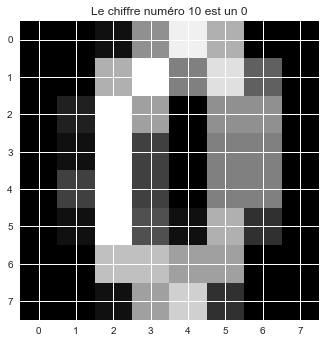

In [7]:
# Amélioration de la visualisation (niveau de gris) et de la légende:
imgplot = plt.imshow(np.reshape(x[idx_to_test, :], (8, 8)), cmap='gray', aspect='equal', interpolation='nearest')
# Attention aux accents: ne pas oublier le u (Unicode) ci-dessous
plt.title(u'Le chiffre numéro %s est un %s' % (idx_to_test, y[idx_to_test]))
plt.show()

# 2. PCA 
## (Principal Component Analysis)

#### Application du PCA avec pca.fit()

In [8]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

#### Fixons le nombre de composantes à 2

In [9]:
X_2d = PCA(n_components=2).fit_transform(x)
principalDf = pd.DataFrame(X_2d, columns = ['component 1', 'component 2'])

In [10]:
principalDf

,component 1,component 2
0,-1.259466,21.274883
1,7.957617,-20.768703
2,6.991915,-9.955979
3,-15.906104,3.332462
4,23.306868,4.269064
5,-14.087088,7.914448
6,21.363409,5.288342
7,-2.952620,-21.071652
8,-5.255131,1.183358
9,-5.480196,8.076325


### Objectif:
Afficher la base de données en dimension 2 après réduction de dimension de 64 à 2 avec une ACP. Colorer les échantillons en fonction des vraies étiquettes.

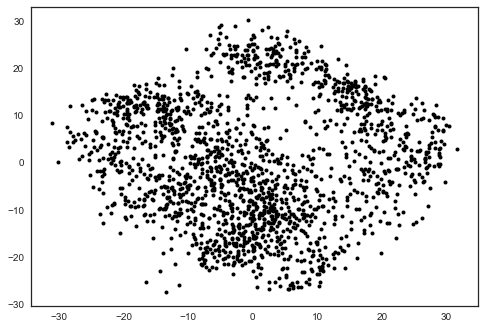

In [11]:
sns.set(style="white")
plt.plot(X_2d[:, 0], X_2d[:, 1], 'k.', markersize=8)
plt.show()

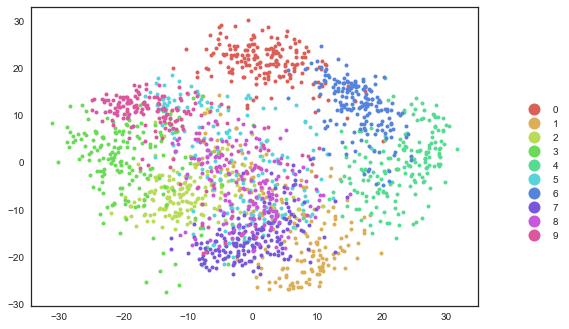

In [12]:
sns.set_palette("hls", 10)
for k in range(10):
    Xk_2d = X_2d[y == k]
    plt.plot(Xk_2d[:, 0], Xk_2d[:, 1], '.', markersize=8, label=k)
    plt.legend(numpoints=1,loc=1, bbox_to_anchor=(1.2, 0.7), markerscale=3)
plt.show()

# 3. Pretraitement de données

In [13]:
# Creation du DataFrame
df = pd.DataFrame(x) 
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [14]:
# Remplacer les valeurs inconnues par la moyenne de la variable
df = df.fillna(df.mean())
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
0     1797 non-null float64
1     1797 non-null float64
2     1797 non-null float64
3     1797 non-null float64
4     1797 non-null float64
5     1797 non-null float64
6     1797 non-null float64
7     1797 non-null float64
8     1797 non-null float64
9     1797 non-null float64
10    1797 non-null float64
11    1797 non-null float64
12    1797 non-null float64
13    1797 non-null float64
14    1797 non-null float64
15    1797 non-null float64
16    1797 non-null float64
17    1797 non-null float64
18    1797 non-null float64
19    1797 non-null float64
20    1797 non-null float64
21    1797 non-null float64
22    1797 non-null float64
23    1797 non-null float64
24    1797 non-null float64
25    1797 non-null float64
26    1797 non-null float64
27    1797 non-null float64
28    1797 non-null float64
29    1797 non-null float64
30    1797 non-null float64
31    1797 non-null float

In [16]:
dup = df.duplicated()
dup

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1767    False
1768    False
1769    False
1770    False
1771    False
1772    False
1773    False
1774    False
1775    False
1776    False
1777    False
1778    False
1779    False
1780    False
1781    False
1782    False
1783    False
1784    False
1785    False
1786    False
1787    False
1788    False
1789    False
1790    False
1791    False
1792    False
1793    False
1794    False
1795    False
1796    False
dtype: bool

In [17]:
# Centrage et reduction
from sklearn import preprocessing
df = preprocessing.StandardScaler().fit_transform(df)
df

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ..., 
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [18]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [19]:
D = PCA(n_components=2).fit_transform(df)
Df = pd.DataFrame(D, columns = ['component 1', 'component 2'])

In [20]:
Df

,component 1,component 2
0,1.914208,-0.954509
1,0.588983,0.924657
2,1.302039,-0.317196
3,-3.020770,-0.868825
4,4.528940,-1.093563
5,-1.301894,-1.148138
6,1.434227,-2.957830
7,0.614221,5.462159
8,-1.098446,-0.665799
9,-0.537973,-0.777455


## Statistique Elementaire

Pour mieux comprendre la base de données on va s'intéresser à quelques études statistiques des variables quantitatifs. On commence par calculer les moyennes par classes pour chacun des chiffres. La moyenne par classe se visualise comme une image qui est une représentantion moyenne pour chaque chiffre de zéro à neuf.

## Calcul de la moyenne par chiffre

#### Calcul d'un représentant moyen du chiffre 0?

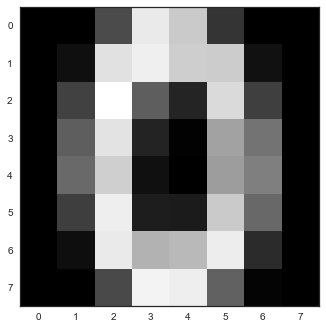

In [21]:
imgplot = plt.imshow(np.reshape(np.mean(x[y == 0, :], axis=0), (8, 8)), cmap='gray', aspect='equal', interpolation='nearest')
plt.show()

#### Calculer un représentant moyen pour chaque chiffre 

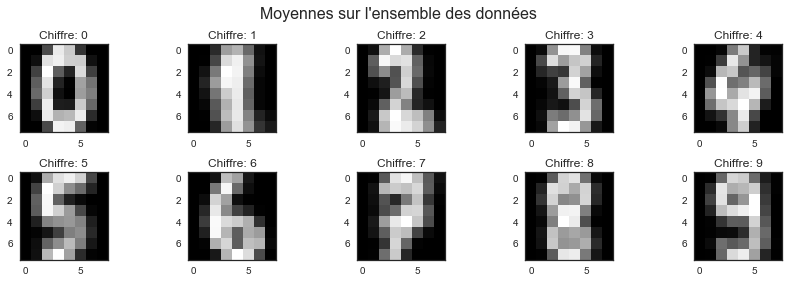

In [22]:
Xi_mean = [np.mean(x[y == cls], axis=0) for cls in classes_list]

# Fonction d'affichage d'une liste d'image
def disp_pics(pic_list, title=''):
    """" Fonction qui affiche une liste d'image codée en vecteur """""
    fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(12, 4))
    plt.suptitle(title, fontsize=16)
    for i in range(10):
        opt = dict(cmap='gray', aspect='equal', interpolation='nearest')
        axs.flat[i].imshow(pic_list[i].reshape(8, 8), **opt)
        axs.flat[i].set_title("Chiffre: %s" % i)
    # Contre-balancer l'affichage pas terrible de matplotlib
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)

# Affichage des images moyennes par classe pour les données  
disp_pics(Xi_mean, title=(u"Moyennes sur l'ensemble des données"))
plt.show()

# 4.  Affichage des données dans l'espace de projection et analyse des composants principals

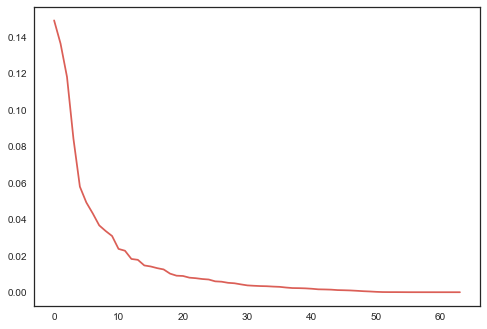

In [23]:
from sklearn.decomposition import PCA
target_name=[0,1,2,3,4,5,6,7,8,9]
# définition de la commande
pca = PCA()
# Estimation, calcul des composantes principales
C = pca.fit(x).transform(x)
# Décroissance de la variance expliquée
plt.plot(pca.explained_variance_ratio_)
plt.show()

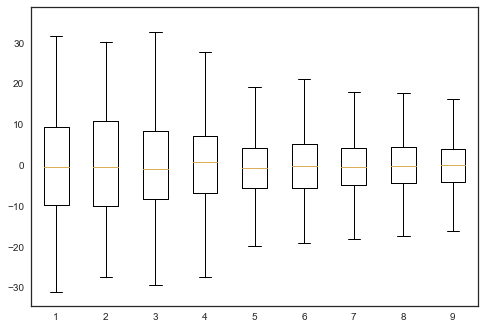

In [24]:
plt.boxplot(C[:,0:9])
plt.show()

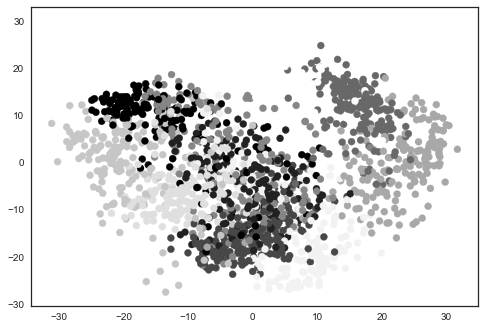

In [25]:
plt.scatter(C[:,0], C[:,1], c=y, label=target_name)
plt.show()

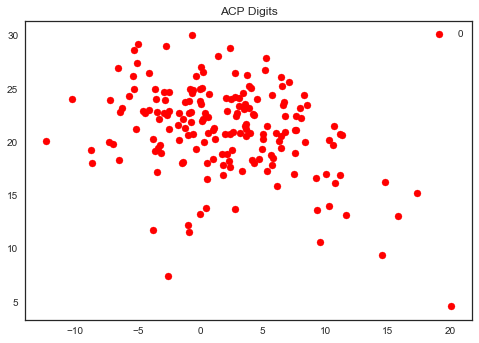

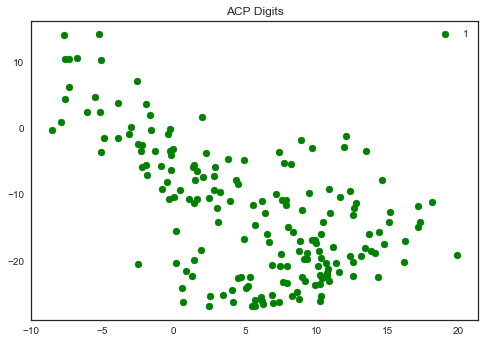

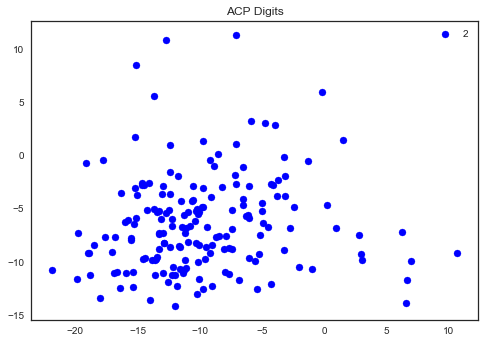

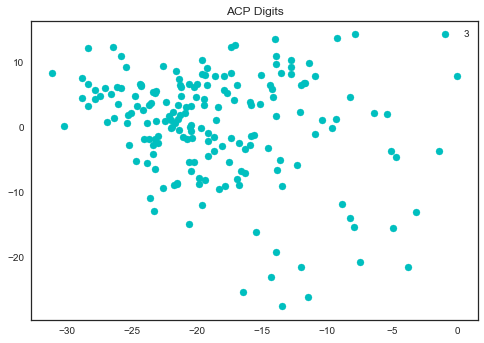

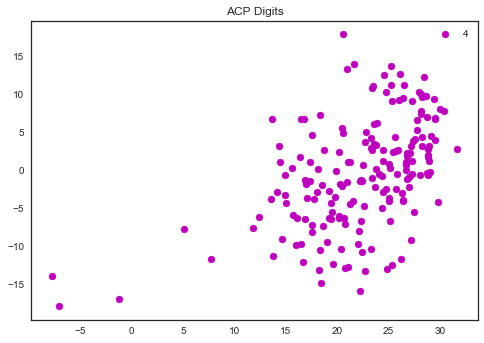

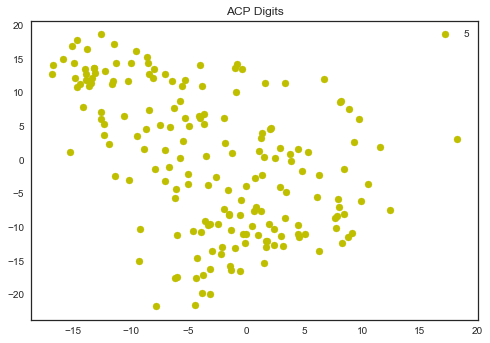

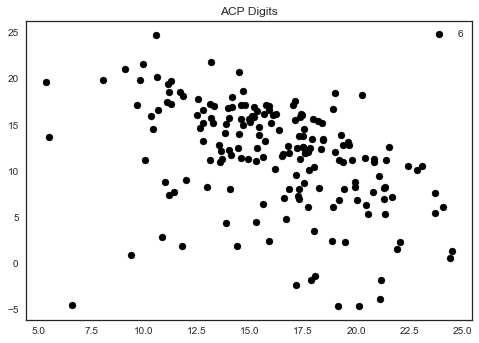

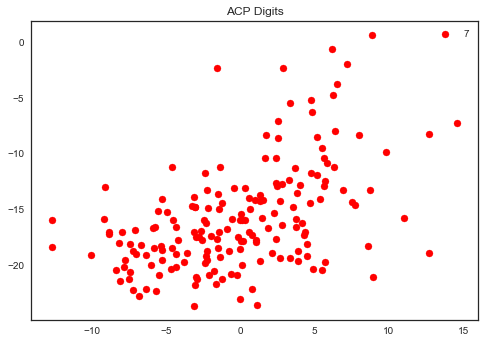

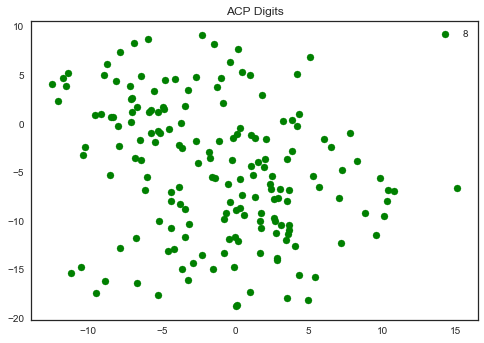

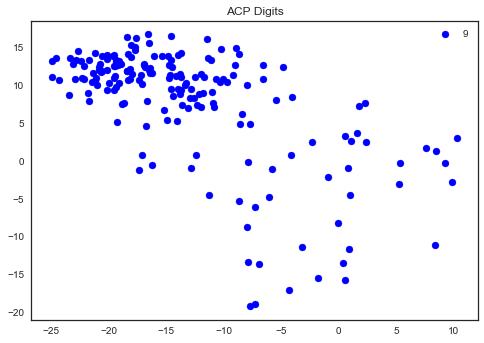

In [26]:
# attention aux indentations meme figure mais colorier et repartie cette fois ci.
plt.figure()
for c, i, target_name in zip("rgbcmykrgb",[0,1,2,3,4,5,6,7,8,9], target_name):
    plt.scatter(C[y == i,0], C[y == i,1], c=c, label=target_name)
    plt.legend()
    plt.title("ACP Digits")
    plt.show()

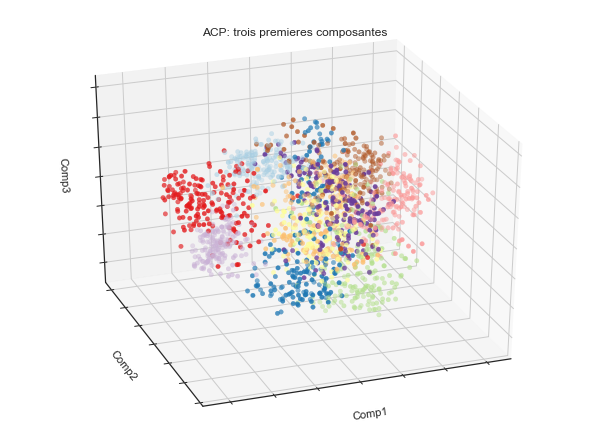

In [27]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], c=y,
cmap=plt.cm.Paired)
ax.set_title("ACP: trois premieres composantes")
ax.set_xlabel("Comp1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Comp2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Comp3")
ax.w_zaxis.set_ticklabels([])
plt.show()

# 5. Partitionnement avec k-mean, affichage et analyse des clusters

In [28]:
np.random.seed(42)
n_samples, n_features = x.shape
n_digits = len(np.unique(y))
sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d" % (n_digits, n_samples, n_features))

n_digits: 10, 	 n_samples 1797, 	 n_features 64


## Affichage du dendrogramme

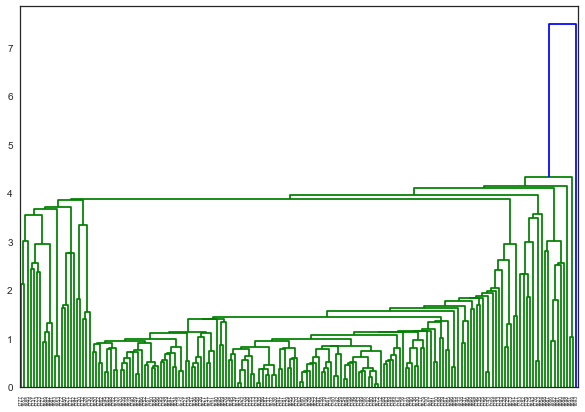

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

linked = linkage(Xk_2d, 'single')

labelList = range(1797)

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  

## Classification  avec les KMeans

Le KMeans algorithme regroupe les données en essayant de séparer les échantillons en n groupes de variance égale, minimisant ainsi un critère appelé inertie ou somme des carrés au sein de la grappe (voir ci-dessous). Cet algorithme nécessite le nombre de clusters à spécifier. Il s'adapte bien à un grand nombre d'échantillons et a été utilisé dans un grand nombre de domaines d'application dans de nombreux domaines différents.

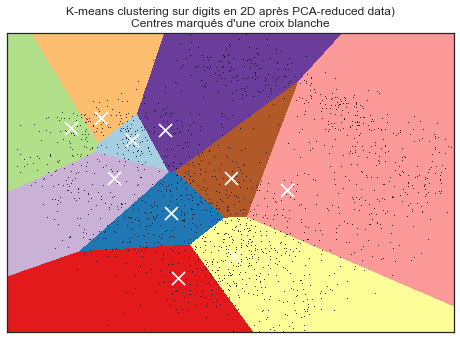

In [30]:
from sklearn.cluster import KMeans
km = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
km.fit(Xk_2d)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_2d[:, 0].min() + 1, X_2d[:, 0].max() - 1
y_min, y_max = X_2d[:, 1].min() + 1, X_2d[:, 1].max() - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = km.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower')

plt.plot(X_2d[:, 0], X_2d[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = km.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='w', zorder=10)
plt.title(u"K-means clustering sur digits en 2D après PCA-reduced data)\n" u"Centres marqués d'une croix blanche")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

# Clustering avec d'autres méthodes

## AffinityPropagation

L'AffinityPropagation crée des grappes en envoyant des messages entre des paires d'échantillons jusqu'à la convergence. Un ensemble de données est ensuite décrit à l’aide d’un petit nombre d’exemplaires, identifiés comme étant les plus représentatifs des autres échantillons. Les messages envoyés entre les paires représentent l'aptitude pour un échantillon d'être l'exemple de l'autre, qui est mis à jour en réponse aux valeurs d'autres paires. Cette mise à jour se produit de manière itérative jusqu'à la convergence, moment auquel les exemples finaux sont choisis, d'où la classification finale.

Estimated number of clusters: 9
Homogeneity: 0.913
Completeness: 0.967
V-measure: 0.939
Adjusted Rand Index: 0.870
Adjusted Mutual Information: 0.908
Silhouette Coefficient: 0.633


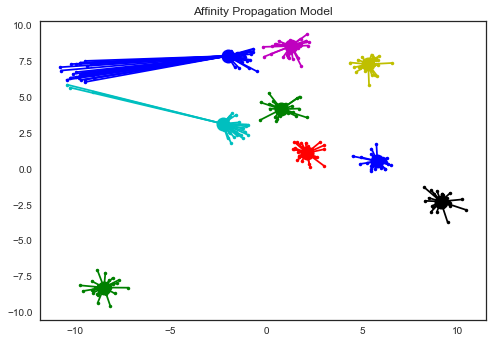

In [31]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
centers = n_digits
Xk_2d, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)


af = AffinityPropagation(preference=-50).fit(Xk_2d)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(Xk_2d, labels, metric='sqeuclidean'))
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = Xk_2d[cluster_centers_indices[k]]
    plt.plot(Xk_2d[class_members, 0], Xk_2d[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in Xk_2d[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Affinity Propagation Model')
plt.show()

## Mean-Shift

MeanShiftle regroupement vise à découvrir des blobs dans une densité lisse d'échantillons. C'est un algorithme basé sur le centroïde, qui fonctionne en mettant à jour les candidats pour que les centroïdes soient la moyenne des points dans une région donnée. Ces candidats sont ensuite filtrés dans une étape de post-traitement pour éliminer les quasi-doublons afin de former le jeu final de centroïdes.

number of estimated clusters : 4


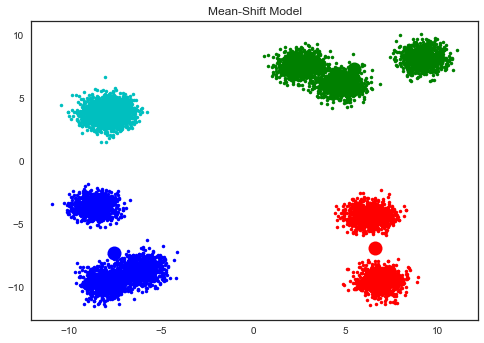

In [32]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

# #############################################################################
# Generate sample data
centers = n_digits
X_2d, _ = make_blobs(n_samples=10000, centers= n_digits, cluster_std=0.6)

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X_2d, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_2d)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X_2d[my_members, 0], X_2d[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
plt.title('Mean-Shift Model')
plt.show()

## Gaussian Mixture Model

Le GaussianMixtureobjet implémente l'algorithme EM ( anticipation-maximization ) pour adapter les modèles de mélange de gaussiennes. Il peut également tirer des ellipsoïdes de confiance pour les modèles multivariés et calculer le critère d'information bayésien pour évaluer le nombre de grappes dans les données. Une GaussianMixture.fitméthode est fournie pour apprendre un modèle de mélange gaussien à partir de données de train. Avec les données de test, il peut attribuer à chaque échantillon le gaussien auquel il appartient probablement en utilisant la GaussianMixture.predictméthode.


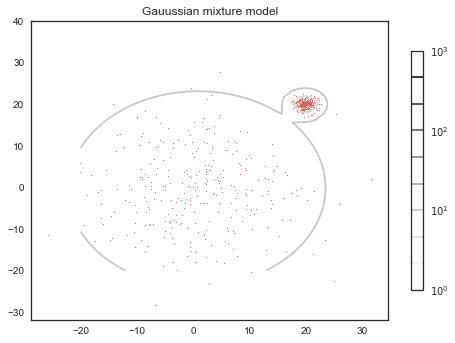

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture

n_samples = 300

# generate random sample, two components
np.random.seed(0)

# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])

# generate zero centered stretched Gaussian data
C = n_digits
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])

# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
clf.fit(X_train)

# display predicted scores by the model as a contour plot
x = np.linspace(-20., 30.)
y = np.linspace(-20., 40.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], .8)

plt.title('Gauussian mixture model')
plt.axis('tight')
plt.show()

# Illustration par une application

### Données

Dans cette partie, nous utilisons les données iris. C’est un échantillon de 150 ﬂeurs de 3 espèces différentes. Ces ﬂeurs sont caractérisées par la longueur et la largeur de leurs pétales et de leurs sépales.Ces 4 caractéristiques sont les variables avec lesquelles nous allons travailler.Ces données sont dans la librairie sklearn.

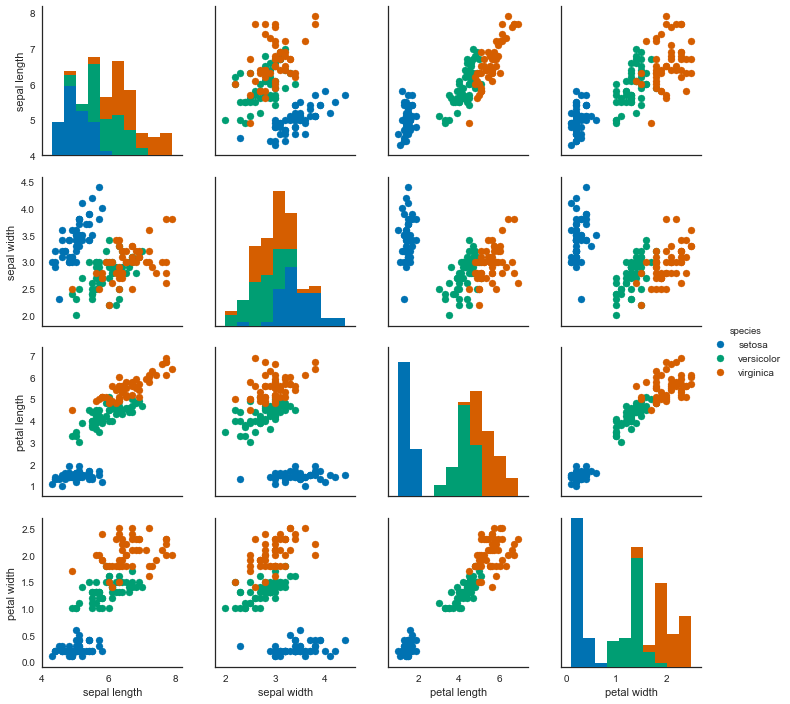

In [34]:
# Scatter plot
iris = sns.load_dataset("iris")

# Creation dataframe
iris_df = pd.DataFrame(iris)
v=iris_df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'species']

g = sns.PairGrid(iris_df, hue="species", palette="colorblind")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

In [35]:
iris = datasets.load_iris() #Utiliser les deux premiers colonnes afin d'avoir un probleme de classification binaire
X = iris.data[:, :2]
y = (iris.target !=0) * 1

In [36]:
print('la taille des donnees:\n',iris_df.shape)
print('les donnees (10 premieres):\n',iris_df[:10])
print('les variables:\n',v)

la taille des donnees:
 (150, 5)
les donnees (10 premieres):
    sepal length  sepal width  petal length  petal width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa
les variables:
 ['sepal length', 'sepal width', 'petal length', 'petal width', 'species']


In [37]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [38]:
# Standarization
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(iris.data)

In [39]:
from sklearn import decomposition
pca= decomposition.PCA(n_components=2)
iris_pca=pca.fit_transform(x)

In [40]:
print(iris_pca.shape)

(150, 2)


In [41]:
print('ACP :\n',iris_pca[:10,:])

ACP :
 [[-2.26454173  0.5057039 ]
 [-2.0864255  -0.65540473]
 [-2.36795045 -0.31847731]
 [-2.30419716 -0.57536771]
 [-2.38877749  0.6747674 ]
 [-2.07053681  1.51854856]
 [-2.44571134  0.07456268]
 [-2.23384186  0.24761393]
 [-2.34195768 -1.09514636]
 [-2.18867576 -0.44862905]]


In [42]:
principalDf= pd.DataFrame(iris_pca, columns=['component 1','component 2'])

In [43]:
principalDf

,component 1,component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
5,-2.070537,1.518549
6,-2.445711,0.074563
7,-2.233842,0.247614
8,-2.341958,-1.095146
9,-2.188676,-0.448629


In [44]:
from sklearn.cluster import KMeans

X = iris_df.get(['sepal length', 'sepal width', 'petal length', 'petal width']).values
y_label = iris_df.get('species')

In [45]:
kmeans=KMeans(n_clusters=3)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [46]:
KMmodel=kmeans.fit(X)
KMmodel

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [47]:
KMmodel.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [48]:
KMmodel.cluster_centers_

array([[ 5.9016129 ,  2.7483871 ,  4.39354839,  1.43387097],
       [ 5.006     ,  3.428     ,  1.462     ,  0.246     ],
       [ 6.85      ,  3.07368421,  5.74210526,  2.07105263]])

In [49]:
import pandas as pd
pd.crosstab(iris.target,KMmodel.labels_)

col_0,0,1,2
row_0,,,
0,0,50,0
1,48,0,2
2,14,0,36


In [50]:
from sklearn.cluster import KMeans
kmeans=KMeans(init='k-means++', n_clusters=3, n_init=10)
KMmodel=kmeans.fit(X)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X[:, 0].min() + 1, X[:, 0].max() - 1
y_min, y_max = X[:, 1].min() + 1, X[:, 1].max() - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = km.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower')

plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = KMmodel.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='w', zorder=10)
plt.title(u"K-means clustering sur iris en 2D après PCA-reduced data)\n" u"Centres marqués d'une croix blanche")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

([], <a list of 0 Text yticklabel objects>)

# CONCLUSION

Les applications de la classification automatique d’images sont nombreuses et vont de l’analyse de documents à la médecine en passant par le domaine militaire. Ainsi on retrouve des applications:
Dans le domaine medical comme la reconnaissance de cellules, de tumeurs dans les mammographies.
Dans l’agriculture comme la classification  de pollen, la reconnaissance du type de sol et des grains, la classification d’herbes. 
Dans le domaine du document comme la reconnaissance d’écriture manuscrite pour les cheques, les codes postaux, les cartes. 
Dans le domaine urbain comme la reconnaissance de panneaux de signalisation, la reconnaissance de pietons, la detection de véhicules, la reconnaissance de batiments pour aider à la localisation.
Dans le domaine de la biomètrie comme la reconnaissance de visage, d’empreintes, d’iris.
Ce qui en fait un champ d'application très élargi.